# <center> NYC Hospital Price Analysis </center>
##  <center> Anne Bode, March 2021 </center>

### <left> Thinkin' about healthcare prices like...</left>
<img src="https://i0.wp.com/boingboing.net/wp-content/uploads/2016/11/bcf.png?fit=680%2C445&ssl=1" width="500"/>

**In 2021, hospitals are required to publish the rates they charge for every procedure they offer, along with all of the rates they negotiate with public and private insurance. The key is that they are required to publish this information in a machine-readable format. So we can finally do some analysis!**

The problem is that the fee for noncompliance is only $300 per hospital per day. That is not high enough to be meaningful for many hospital systems. So unfortunately, not many hospital systems have published this information and are choosing to remain in noncompliance. See this helpful gothamist article: [NY Hospitals Slow To Comply With New Price Transparency Rule That Took Effect This Month](https://gothamist.com/news/ny-hospitals-drags-feet-complying-new-price-transparency-rule-took-effect-month).

Fortunately, the NYC Public Hospital System has provided decent data. They include their list, cash, and negotiated rates with a number of public and (perhaps not all) private insurers.

In this project we will look at:
1. List price vs. cash price vs. negotiated price per procedure (within the same hospital)
2. List price and cash price for the same procedure across the different hospitals within the NYC public hospital system

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## <font color=blue> Import and Clean NYC Public Hospital Data </font>

The NYC public hospital system has published prices for all of their procedures at all of their facilities. In this data, there is the list price, discounted cash price, and the negotiated price for a number of insurance plans (though not all plans, it appears).

You can download the files [here](https://www.nychealthandhospitals.org/paying-for-your-health-care/your-healthcare-costs/facility-charges/). However, we will pull the files automatically in the code below.

In [178]:
hospitals = ['Bellevue','Coney Island','Elmhurst','Harlem',
             'Jacobi','Kings County','Lincoln','Metropolitan',
             'North Central Bronx', 'Queens','Woodhull']

In [179]:
base_url = 'https://hhinternet.blob.core.windows.net/machine-readable/'
data_dict = {}
for h in hospitals:
    data_dict[h] = pd.read_csv(base_url+h.replace(' ','_')+'.csv')

data_dict['Bellevue'].head()

C:\Users\abode\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (3,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\abode\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (3,4,9,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\abode\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (3,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Procedure,Code Type,Code,NDC,Rev Code,Procedure Description,Payer,Plan(s),IP Price,OP Price,Discounted Cash Price,IP Negotiated Charge,OP Negotiated Charge,PB Negotiated Charge,De-Identified Minimum Negotiated Charge (IP),De-Identified Maximum Negotiated Charge (IP),De-Identified Minimum Negotiated Charge (OP),De-Identified Maximum Negotiated Charge (OP)
0,7509657101,EAP,96571,NaN,NaN,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,1199 NATIONAL BENEFIT FUND [5140],1199SEIU BENEFIT FUND [514001],"1,073.73","1,073.73",429.49,NaN,32.00,NaN,NaN,NaN,32.0,53.66
1,7509657101,EAP,96571,NaN,NaN,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,AETNA COMM [5020],AETNA COMMERCIAL [502005],"1,073.73","1,073.73",429.49,NaN,53.66,NaN,NaN,NaN,32.0,53.66
2,7509657101,EAP,96571,NaN,NaN,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,HEALTHFIRST MCR [2340],HEALTHFIRST COMPLETECARE HMO SNP [234001],"1,073.73","1,073.73",429.49,NaN,NaN,NaN,NaN,NaN,32.0,53.66
3,7509657101,EAP,96571,NaN,NaN,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,MEDICAID ALTERNATE PAYER [3083000],MEDICAID FFS [3083001001],"1,073.73","1,073.73",429.49,NaN,NaN,NaN,NaN,NaN,32.0,53.66
4,7509657101,EAP,96571,NaN,NaN,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,MEDICARE [2000],MEDICARE AB [200000],"1,073.73","1,073.73",429.49,NaN,NaN,NaN,NaN,NaN,32.0,53.66


In [180]:
# add hospital name as a column in each dataframe so that we can concatenate and retain source
for h in hospitals:
    data_dict[h]['Hospital Name'] = h

In [181]:
#concatenate all the hospital dataframes into one master dataframe
#remove commas and then convert necessary columns to floats from objects
masterfile = pd.concat(i for i in data_dict.values())
masterfile.replace(',','', regex=True, inplace=True)
masterfile = masterfile.astype({'IP Price':'float64','OP Price':'float64','Discounted Cash Price':'float64',
                                'IP Negotiated Charge':'float64','OP Negotiated Charge':'float64'})
masterfile.head()

,Procedure,Code Type,Code,NDC,Rev Code,Procedure Description,Payer,Plan(s),IP Price,OP Price,Discounted Cash Price,IP Negotiated Charge,OP Negotiated Charge,PB Negotiated Charge,De-Identified Minimum Negotiated Charge (IP),De-Identified Maximum Negotiated Charge (IP),De-Identified Minimum Negotiated Charge (OP),De-Identified Maximum Negotiated Charge (OP),Hospital Name
0,7509657101,EAP,96571,NaN,NaN,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,1199 NATIONAL BENEFIT FUND [5140],1199SEIU BENEFIT FUND [514001],1073.73,1073.73,429.49,NaN,32.00,NaN,NaN,NaN,32.0,53.66,Bellevue
1,7509657101,EAP,96571,NaN,NaN,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,AETNA COMM [5020],AETNA COMMERCIAL [502005],1073.73,1073.73,429.49,NaN,53.66,NaN,NaN,NaN,32.0,53.66,Bellevue
2,7509657101,EAP,96571,NaN,NaN,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,HEALTHFIRST MCR [2340],HEALTHFIRST COMPLETECARE HMO SNP [234001],1073.73,1073.73,429.49,NaN,NaN,NaN,NaN,NaN,32.0,53.66,Bellevue
3,7509657101,EAP,96571,NaN,NaN,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,MEDICAID ALTERNATE PAYER [3083000],MEDICAID FFS [3083001001],1073.73,1073.73,429.49,NaN,NaN,NaN,NaN,NaN,32.0,53.66,Bellevue
4,7509657101,EAP,96571,NaN,NaN,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,MEDICARE [2000],MEDICARE AB [200000],1073.73,1073.73,429.49,NaN,NaN,NaN,NaN,NaN,32.0,53.66,Bellevue


In [182]:
#ensure relevant columns are now floats
masterfile.dtypes

Procedure                                        object
Code Type                                        object
Code                                             object
NDC                                              object
Rev Code                                         object
Procedure Description                            object
Payer                                            object
Plan(s)                                          object
IP Price                                        float64
OP Price                                        float64
Discounted Cash Price                           float64
IP Negotiated Charge                            float64
OP Negotiated Charge                            float64
PB Negotiated Charge                             object
De-Identified Minimum Negotiated Charge (IP)    float64
De-Identified Maximum Negotiated Charge (IP)    float64
De-Identified Minimum Negotiated Charge (OP)    float64
De-Identified Maximum Negotiated Charge (OP)    

In [183]:
# label a row "OP" (Outpatient) or "IP" (Inpatient) depending on the medical billing code type
# MS-DRG is used for inpatient care at hospitals
masterfile['Procedure Type'] = np.where(masterfile['Code'].str.contains('MS-DRG'), 'IP', 'OP')
masterfile.head()

,Procedure,Code Type,Code,NDC,Rev Code,Procedure Description,Payer,Plan(s),IP Price,OP Price,Discounted Cash Price,IP Negotiated Charge,OP Negotiated Charge,PB Negotiated Charge,De-Identified Minimum Negotiated Charge (IP),De-Identified Maximum Negotiated Charge (IP),De-Identified Minimum Negotiated Charge (OP),De-Identified Maximum Negotiated Charge (OP),Hospital Name,Procedure Type
0,7509657101,EAP,96571,NaN,NaN,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,1199 NATIONAL BENEFIT FUND [5140],1199SEIU BENEFIT FUND [514001],1073.73,1073.73,429.49,NaN,32.00,NaN,NaN,NaN,32.0,53.66,Bellevue,OP
1,7509657101,EAP,96571,NaN,NaN,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,AETNA COMM [5020],AETNA COMMERCIAL [502005],1073.73,1073.73,429.49,NaN,53.66,NaN,NaN,NaN,32.0,53.66,Bellevue,OP
2,7509657101,EAP,96571,NaN,NaN,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,HEALTHFIRST MCR [2340],HEALTHFIRST COMPLETECARE HMO SNP [234001],1073.73,1073.73,429.49,NaN,NaN,NaN,NaN,NaN,32.0,53.66,Bellevue,OP
3,7509657101,EAP,96571,NaN,NaN,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,MEDICAID ALTERNATE PAYER [3083000],MEDICAID FFS [3083001001],1073.73,1073.73,429.49,NaN,NaN,NaN,NaN,NaN,32.0,53.66,Bellevue,OP
4,7509657101,EAP,96571,NaN,NaN,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,MEDICARE [2000],MEDICARE AB [200000],1073.73,1073.73,429.49,NaN,NaN,NaN,NaN,NaN,32.0,53.66,Bellevue,OP


In [184]:
# create copy of masterfile for further manipulation
df_final = masterfile.copy()

# create one single "List Price" column, coalescing IP Price/OP Price for applicable procedures
df_final['List Price'] = np.where(df_final['Procedure Type'] == 'IP',
                                  df_final['IP Price'],
                                  df_final['OP Price'])

# create one single "Negotiated Price" column, coalescing IP Negotiated Charge/OP Negotiated Charge for applicable procedures
df_final['Negotiated Price'] = np.where(df_final['Procedure Type'] == 'IP',
                                        df_final['IP Negotiated Charge'],
                                        df_final['OP Negotiated Charge'])

# create one single "Adjusted Cash Price" column
# if the Discounted cash price is $0, default to the List Price
# if the Discounted cash price is more expensive than the List Price, use the List Price
# otherwise, use the Discounted Cash Price
df_final['Adjusted Cash Price'] = np.where(df_final['Discounted Cash Price']==0,
                                           df_final['List Price'],
                                           np.where(df_final['Discounted Cash Price']>df_final['List Price'],
                                                    df_final['List Price'],
                                                    df_final['Discounted Cash Price']
                                                   )
                                          )
# remove strange outlier data which often occurs when the List Price for a procedure is < $1
df_final = df_final[df_final['List Price']>=1]

# keep only the columns we need
df_final = df_final[['Procedure','Code','Procedure Description','Procedure Type','Payer','Plan(s)',
                     'List Price','Adjusted Cash Price','Negotiated Price','Hospital Name']]

# calculate the difference between the negotiated price and the list price; fill errors with 0 (no negotiated rate)
df_final['Negotiated vs. List'] = df_final['Negotiated Price']/df_final['List Price']-1
df_final['Negotiated vs. List'] = df_final['Negotiated vs. List'].fillna(0)

# calculate the difference between the adjusted cash price and the list price
df_final['Cash vs. List'] = df_final['Adjusted Cash Price']/df_final['List Price']-1

# drop infinite results -- no longer necessary since we dropped where List Price <1
#df_final = df_final.replace([np.inf, -np.inf], np.nan).dropna(subset=['Negotiated vs. List', 'Cash vs. List'], how="all")

# correctly calculate difference in price paid between those with insurance and those without, for outpatient procedures
df_final['Negotiated vs. Cash'] = np.where(df_final['Negotiated Price'].isna(), # where there is no negotiated price
                                           df_final['List Price']/df_final['Adjusted Cash Price']-1, # compare the list price to the cash price
                                           df_final['Negotiated Price']/df_final['Adjusted Cash Price']-1, # return negotiated vs. cash
                                          )

df_final.head()

,Procedure,Code,Procedure Description,Procedure Type,Payer,Plan(s),List Price,Adjusted Cash Price,Negotiated Price,Hospital Name,Negotiated vs. List,Cash vs. List,Negotiated vs. Cash
0,7509657101,96571,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,1199 NATIONAL BENEFIT FUND [5140],1199SEIU BENEFIT FUND [514001],1073.73,429.49,32.00,Bellevue,-0.970197,-0.600002,-0.925493
1,7509657101,96571,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,AETNA COMM [5020],AETNA COMMERCIAL [502005],1073.73,429.49,53.66,Bellevue,-0.950025,-0.600002,-0.875061
2,7509657101,96571,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,HEALTHFIRST MCR [2340],HEALTHFIRST COMPLETECARE HMO SNP [234001],1073.73,429.49,NaN,Bellevue,0.000000,-0.600002,1.500012
3,7509657101,96571,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,MEDICAID ALTERNATE PAYER [3083000],MEDICAID FFS [3083001001],1073.73,429.49,NaN,Bellevue,0.000000,-0.600002,1.500012
4,7509657101,96571,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,MEDICARE [2000],MEDICARE AB [200000],1073.73,429.49,NaN,Bellevue,0.000000,-0.600002,1.500012


In [185]:
df_IP = df_final[df_final['Procedure Type'] == 'IP']
df_OP = df_final[df_final['Procedure Type'] == 'OP']

In [186]:
len(df_IP), len(df_OP)

(32208, 2387526)

In [187]:
IP_Plans = df_IP['Plan(s)'].value_counts()
Num_IP_Plans = len(IP_Plans)

print(Num_IP_Plans)
IP_Plans

4


UHC COMMUNITY PLAN CHP [509009]              8074
HEALTHFIRST COMPLETECARE HMO SNP [234001]    8063
MEDICARE AB [200000]                         8063
METROPLUS MEDICAID [120100]                  8008
Name: Plan(s), dtype: int64

In [188]:
OP_Plans = df_OP['Plan(s)'].value_counts()
Num_OP_Plans = len(OP_Plans)

print(Num_OP_Plans)
OP_Plans

7


UHC COMMUNITY PLAN CHP [509009]              363901
MEDICARE AB [200000]                         363764
HEALTHFIRST COMPLETECARE HMO SNP [234001]    363302
1199SEIU BENEFIT FUND [514001]               324822
AETNA COMMERCIAL [502005]                    324822
MEDICAID FFS [3083001001]                    323755
METROPLUS MEDICAID [120100]                  323160
Name: Plan(s), dtype: int64

In [189]:
# remove procedures from the IP dataframe if there isn't data for each insurance plan
Rare_IP_Procedures = df_final[df_final['Procedure Type'] == 'IP'][['Procedure','Plan(s)','Hospital Name']].copy()
Rare_IP_Procedures.drop_duplicates(inplace=True)
Rare_IP_Procedures = Rare_IP_Procedures.groupby(['Procedure']).count()
Rare_IP_Procedures.sort_values(by='Hospital Name',ascending=False,inplace=True)
Rare_IP_Procedures.reset_index(inplace=True)

Rare_IP_Procedures = Rare_IP_Procedures[Rare_IP_Procedures['Hospital Name']<(Num_IP_Plans*len(hospitals))].copy()

IP_final = df_IP[~df_IP['Procedure'].isin(Rare_IP_Procedures['Procedure'].tolist())]

len(df_IP), len(IP_final)

(32208, 32032)

In [190]:
# remove procedures from the OP dataframe if there isn't data for each insurance plan
Rare_OP_Procedures = df_final[df_final['Procedure Type'] == 'OP'][['Procedure','Plan(s)','Hospital Name']].copy()
Rare_OP_Procedures.drop_duplicates(inplace=True)
Rare_OP_Procedures = Rare_OP_Procedures.groupby(['Procedure']).count()
Rare_OP_Procedures.sort_values(by='Hospital Name',ascending=False,inplace=True)
Rare_OP_Procedures.reset_index(inplace=True)

Rare_OP_Procedures = Rare_OP_Procedures[Rare_OP_Procedures['Hospital Name']<(Num_OP_Plans * len(hospitals))].copy()
OP_final = df_OP[~df_OP['Procedure'].isin(Rare_OP_Procedures['Procedure'].tolist())]

len(df_OP), len(OP_final)

(2387526, 2247211)

## <font color=blue> 1. Comparing List, Cash, and Negotiated Rates by Insurance Plans </font>

For each insurance plan + uninsured option (cash price), we will calculate the mean and median of:
- negotiated price vs. list price across all procedures (for cash, this is just the cash price vs. list price)
- negotiated price vs. cash price across all procedures (for cash, this is N/A)

Because there may be some uncommon procedures that have no negotiated rate (only list price/cash price), we will also look at these stats across only the procedures where the insurer has negotiated a rate. So, when an insurance company DOES negotiate a rate, how much of a discount does the patient get, essentially.

Finally, we will take a look at what % of procedures each plan has negotiated a rate for. How hard are they working for their patients?

We will calculate this for both Inpatient procedures and Outpatient.

### <font color=orange> Inpatient Calculations </font>

In [191]:
# calculate means/medians across all procedures

# negotiated vs. list
IP_neg_list_mean = IP_final[['Plan(s)','Negotiated vs. List']].groupby(['Plan(s)']).mean()
IP_neg_list_mean.rename(columns={'Negotiated vs. List':'Negotiated vs. List Mean'},inplace=True)
IP_neg_list_median = IP_final[['Plan(s)','Negotiated vs. List']].groupby(['Plan(s)']).median()
IP_neg_list_median.rename(columns={'Negotiated vs. List':'Negotiated vs. List Median'},inplace=True)

# negotiated vs. cash (n/a for cash - 0 in table for graphing purposes)
IP_neg_cash_mean = IP_final[['Plan(s)','Negotiated vs. Cash']].groupby(['Plan(s)']).mean()
IP_neg_cash_mean.rename(columns={'Negotiated vs. Cash':'Negotiated vs. Cash Mean'},inplace=True)
IP_neg_cash_median = IP_final[['Plan(s)','Negotiated vs. Cash']].groupby(['Plan(s)']).median()
IP_neg_cash_median.rename(columns={'Negotiated vs. Cash':'Negotiated vs. Cash Median'},inplace=True)

# cash vs. list
IP_cash_list_mean = IP_final['Cash vs. List'].mean()
IP_cash_list_median = IP_final['Cash vs. List'].median()

In [192]:
# now calculate means/medians for only those procedures where a rate has been negotiated
IP_negotiated_only = IP_final[IP_final['Negotiated vs. List']!=0]

# negotiated vs. list
IPNO_neg_list_mean = IP_negotiated_only[['Plan(s)','Negotiated vs. List']].groupby(['Plan(s)']).mean()
IPNO_neg_list_mean.rename(columns={'Negotiated vs. List':'Negotiated ONLY vs. List Mean'},inplace=True)
IPNO_neg_list_median = IP_negotiated_only[['Plan(s)','Negotiated vs. List']].groupby(['Plan(s)']).median()
IPNO_neg_list_median.rename(columns={'Negotiated vs. List':'Negotiated ONLY vs. List Median'},inplace=True)

# negotiated vs. cash (n/a for cash - 0 in table for graphing purposes)
IPNO_neg_cash_mean = IP_negotiated_only[['Plan(s)','Negotiated vs. Cash']].groupby(['Plan(s)']).mean()
IPNO_neg_cash_mean.rename(columns={'Negotiated vs. Cash':'Negotiated ONLY vs. Cash Mean'},inplace=True)
IPNO_neg_cash_median = IP_negotiated_only[['Plan(s)','Negotiated vs. Cash']].groupby(['Plan(s)']).median()
IPNO_neg_cash_median.rename(columns={'Negotiated vs. Cash':'Negotiated ONLY vs. Cash Median'},inplace=True)

# cash vs. list; drop dupes
IP_cash_NO = IP_negotiated_only[['Procedure','Cash vs. List']].drop_duplicates()

IPNO_cash_list_mean = IP_cash_NO['Cash vs. List'].mean()
IPNO_cash_list_median = IP_cash_NO['Cash vs. List'].median()

In [193]:
# calculate what % of procedures the insurance plan has negotiated a rate for
IP_negotiated_percent = IP_final[['Plan(s)','Procedure']].groupby(['Plan(s)']).count()
IP_negotiated_percent_temp = IP_negotiated_only[['Plan(s)','Procedure']].groupby(['Plan(s)']).count()
IP_negotiated_percent = pd.merge(IP_negotiated_percent,IP_negotiated_percent_temp,on=['Plan(s)'])

IP_negotiated_percent.rename(columns={'Procedure_x':'Total Procedures', 'Procedure_y':'Negotiated Procedures'}, inplace=True)
IP_negotiated_percent['% Negotiated'] = IP_negotiated_percent['Negotiated Procedures']/IP_negotiated_percent['Total Procedures']

In [194]:
# merge results into one dataframe
IP_calculations = pd.merge(IP_neg_list_mean,IP_neg_list_median,on=['Plan(s)'])
IP_calculations = pd.merge(IP_calculations,IP_neg_cash_mean,on=['Plan(s)'])
IP_calculations = pd.merge(IP_calculations,IP_neg_cash_median,on=['Plan(s)'])
IP_calculations = pd.merge(IP_calculations,IPNO_neg_list_mean,on=['Plan(s)'])
IP_calculations = pd.merge(IP_calculations,IPNO_neg_list_median,on=['Plan(s)'])
IP_calculations = pd.merge(IP_calculations,IPNO_neg_cash_mean,on=['Plan(s)'])
IP_calculations = pd.merge(IP_calculations,IPNO_neg_cash_median,on=['Plan(s)'])
IP_calculations = pd.merge(IP_calculations,IP_negotiated_percent['% Negotiated'],on=['Plan(s)'])

IP_calculations.loc['Cash'] = [IP_cash_list_mean, IP_cash_list_median, 0, 0, IPNO_cash_list_mean, IPNO_cash_list_median, 0, 0, 0]

IP_calculations

,Negotiated vs. List Mean,Negotiated vs. List Median,Negotiated vs. Cash Mean,Negotiated vs. Cash Median,Negotiated ONLY vs. List Mean,Negotiated ONLY vs. List Median,Negotiated ONLY vs. Cash Mean,Negotiated ONLY vs. Cash Median,% Negotiated
Plan(s),,,,,,,,,
HEALTHFIRST COMPLETECARE HMO SNP [234001],-0.180549,-0.189676,0.620523,0.247935,-0.252283,-0.403062,0.451869,0.128006,0.715659
MEDICARE AB [200000],-0.014200,0.000000,0.954415,0.724855,-0.020842,-0.125642,0.895886,0.604501,0.681319
METROPLUS MEDICAID [120100],-0.550960,-0.702983,-0.120638,-0.384137,-0.675148,-0.733995,-0.362903,-0.485626,0.816059
UHC COMMUNITY PLAN CHP [509009],-0.406250,-0.521707,0.190553,-0.049970,-0.539690,-0.624710,-0.089778,-0.317683,0.752747
Cash,-0.374694,-0.589069,0.000000,0.000000,-0.521660,-0.600000,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'INPATIENT: Insurance Plan Negotiated Rate Differences')

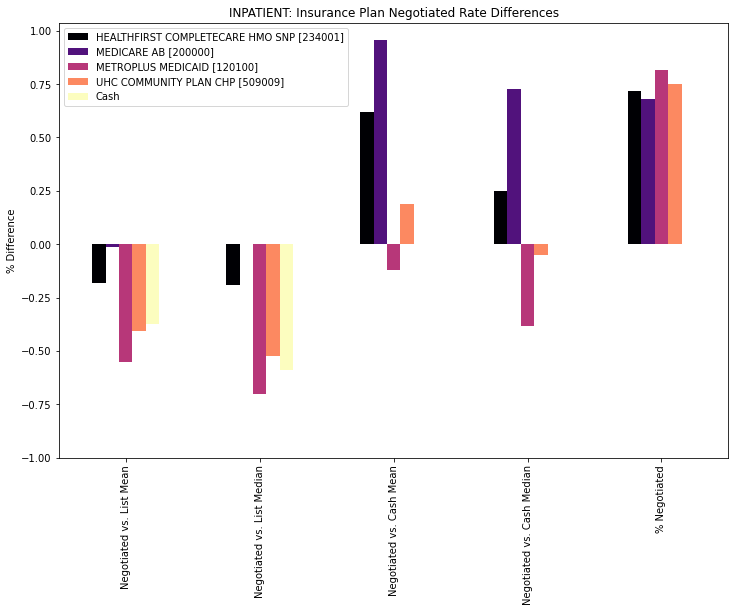

In [195]:
# plot the overall stats
IP_graph = IP_calculations[['Negotiated vs. List Mean',
                            'Negotiated vs. List Median',
                            'Negotiated vs. Cash Mean',
                            'Negotiated vs. Cash Median',
                            '% Negotiated']].transpose()
IP_graph.plot(kind='bar', colormap='magma', figsize=(12, 8))
plt.ylabel('% Difference')
plt.yticks(np.arange(-1, 1.1, step=0.25))
#plt.axhline(0,color='black',linewidth=0.5) # x = 0
plt.legend(loc='upper left')
plt.title('INPATIENT: Insurance Plan Negotiated Rate Differences')

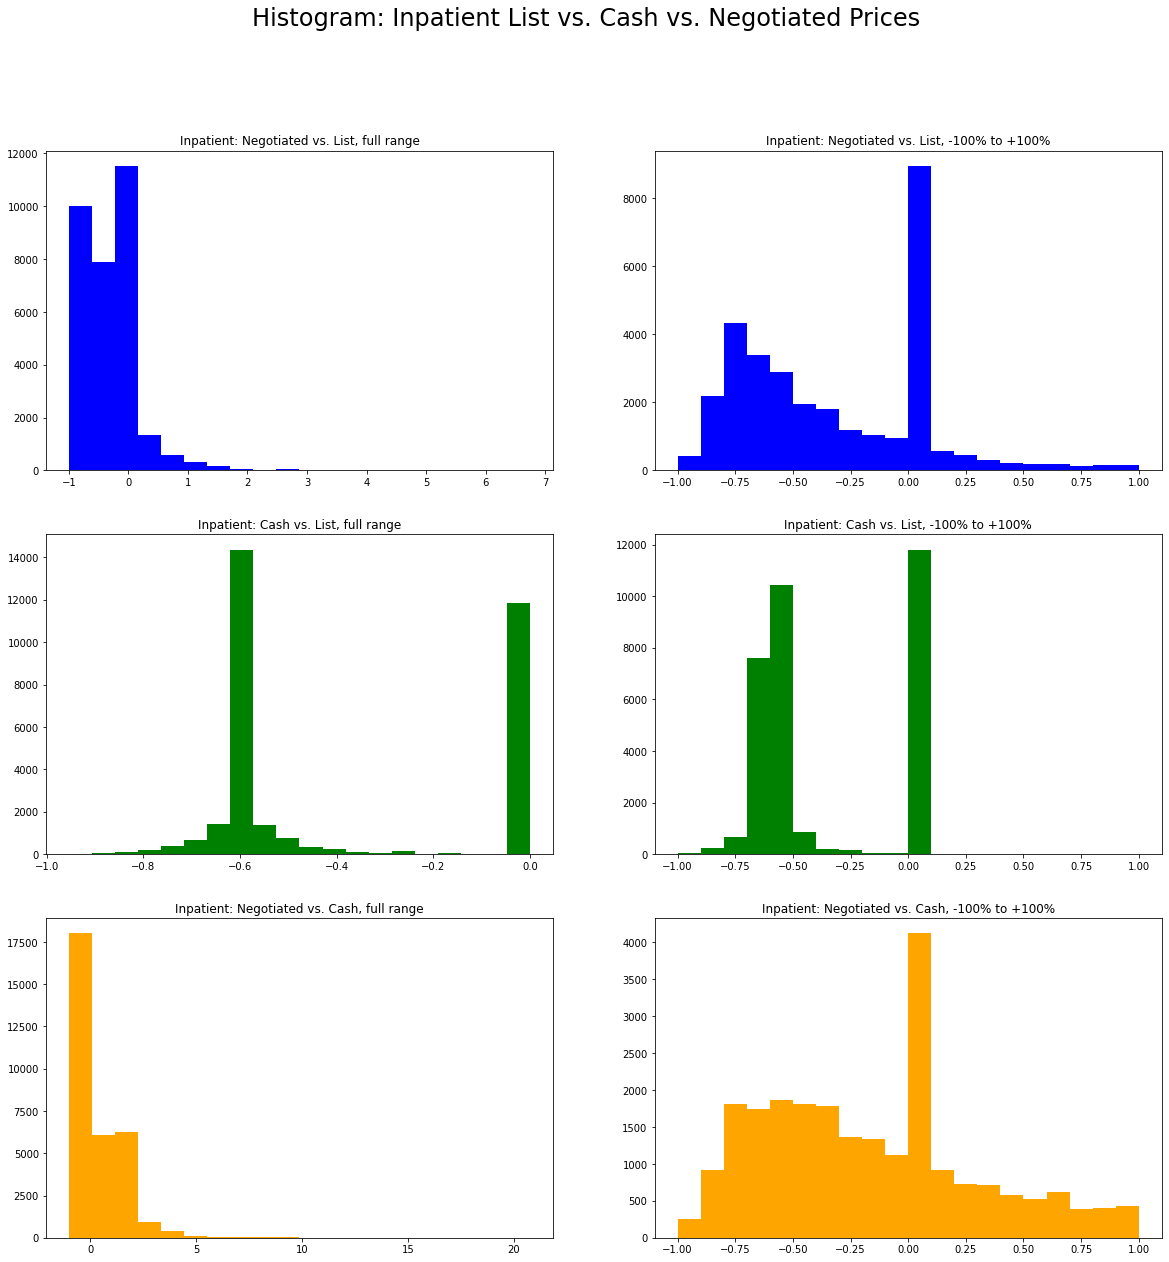

In [196]:
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(20,20))
fig.suptitle('Histogram: Inpatient List vs. Cash vs. Negotiated Prices',size=24)

axs = axs.ravel()

axs[0].hist(IP_final['Negotiated vs. List'],bins=20,color='blue')
axs[0].set_title('Inpatient: Negotiated vs. List, full range')

axs[1].hist(IP_final['Negotiated vs. List'],bins=20,color='blue',range=[-1,1])
axs[1].set_title('Inpatient: Negotiated vs. List, -100% to +100%')

axs[2].hist(IP_final['Cash vs. List'],bins=20,color='green')
axs[2].set_title('Inpatient: Cash vs. List, full range')

axs[3].hist(IP_final['Cash vs. List'],bins=20,color='green',range=[-1,1])
axs[3].set_title('Inpatient: Cash vs. List, -100% to +100%')

axs[4].hist(IP_final['Negotiated vs. Cash'],bins=20,color='orange')
axs[4].set_title('Inpatient: Negotiated vs. Cash, full range')

axs[5].hist(IP_final['Negotiated vs. Cash'],bins=20,color='orange',range=[-1,1])
axs[5].set_title('Inpatient: Negotiated vs. Cash, -100% to +100%')

plt.show()

Text(0.5, 1.0, 'INPATIENT: Insurance Plan Negotiated Rate Differences, Where Insurer Negotiated Rate')

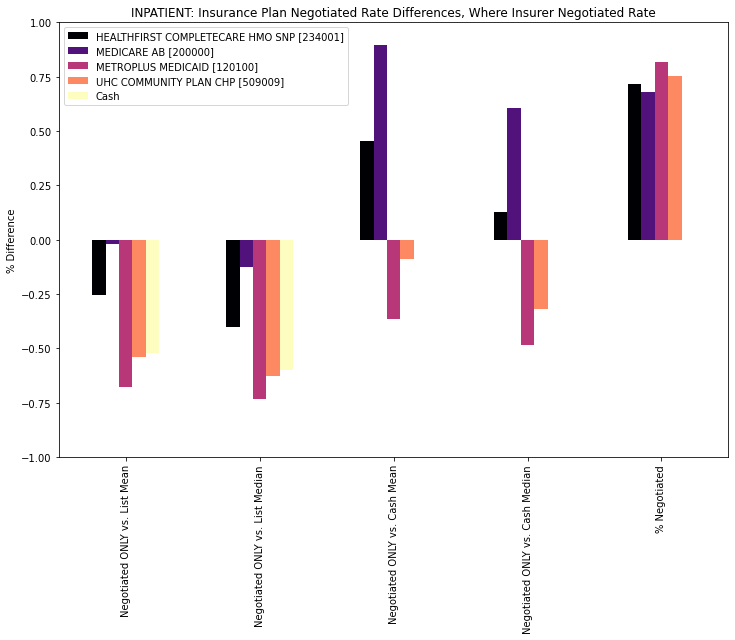

In [197]:
# plot the negotiated only stats
IP_graph2 = IP_calculations[['Negotiated ONLY vs. List Mean',
                             'Negotiated ONLY vs. List Median',
                             'Negotiated ONLY vs. Cash Mean',
                             'Negotiated ONLY vs. Cash Median',
                             '% Negotiated']].transpose()
IP_graph2.plot(kind='bar', colormap='magma', figsize=(12, 8))

plt.ylabel('% Difference')
plt.yticks(np.arange(-1, 1.1, step=0.25))
plt.legend(loc='upper left')
plt.title('INPATIENT: Insurance Plan Negotiated Rate Differences, Where Insurer Negotiated Rate')

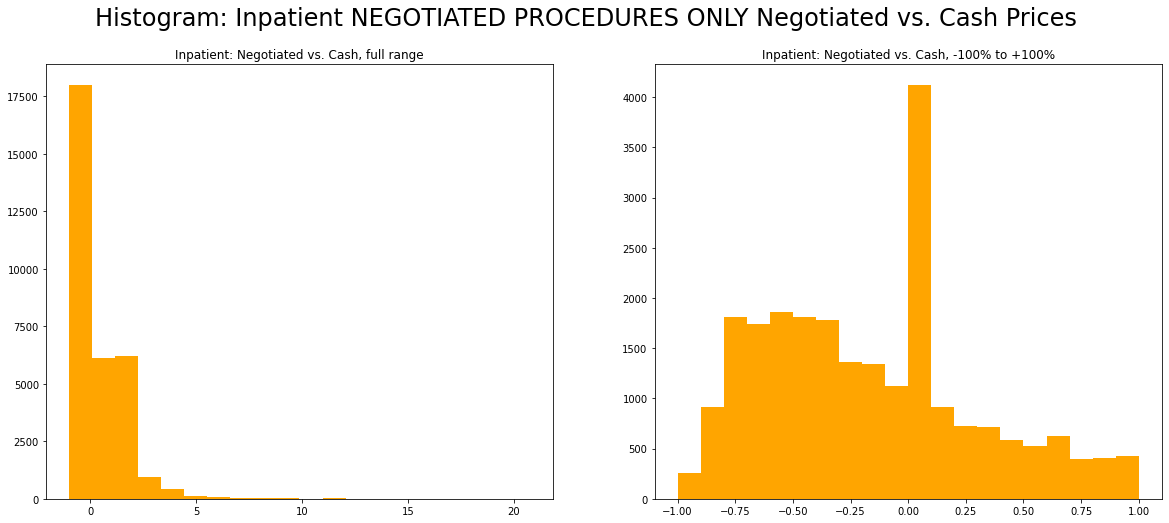

In [198]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
fig.suptitle('Histogram: Inpatient NEGOTIATED PROCEDURES ONLY Negotiated vs. Cash Prices',size=24)

axs = axs.ravel()

axs[0].hist(IP_final['Negotiated vs. Cash'],bins=20,color='orange')
axs[0].set_title('Inpatient: Negotiated vs. Cash, full range')

axs[1].hist(IP_final['Negotiated vs. Cash'],bins=20,color='orange',range=[-1,1])
axs[1].set_title('Inpatient: Negotiated vs. Cash, -100% to +100%')

plt.show()

In [199]:
IP_NvC_dict = {}
for plan in IP_Plans.index:
    temp_df = IP_final[IP_final['Plan(s)']==plan].copy()
    
    better_negotiated = round(len(temp_df[temp_df['Negotiated vs. Cash'] < 0])/len(temp_df),4)*100
    no_difference = round(len(temp_df[temp_df['Negotiated vs. Cash'] == 0])/len(temp_df),4)*100
    worse_negotiated = round(100 -(better_negotiated + no_difference),4)
    
    IP_NvC_dict[plan] = [better_negotiated,no_difference,worse_negotiated]
    
IP_NvC_df = pd.DataFrame.from_dict(IP_NvC_dict,orient='index',columns=['% Better than Cash', '% Same as Cash', '% Worse than Cash'])
IP_NvC_df

,% Better than Cash,% Same as Cash,% Worse than Cash
UHC COMMUNITY PLAN CHP [509009],51.81,9.64,38.55
HEALTHFIRST COMPLETECARE HMO SNP [234001],30.69,10.61,58.70
MEDICARE AB [200000],19.43,12.05,68.52
METROPLUS MEDICAID [120100],72.95,6.69,20.36


In [200]:
IP_NvCNO_dict = {}
for plan in IP_Plans.index:
    temp_df = IP_negotiated_only[IP_negotiated_only['Plan(s)']==plan].copy()
    
    better_negotiated = round(len(temp_df[temp_df['Negotiated vs. Cash'] < 0])/len(temp_df),4)*100
    no_difference = round(len(temp_df[temp_df['Negotiated vs. Cash'] == 0])/len(temp_df),4)*100
    worse_negotiated = round(100 -(better_negotiated + no_difference),4)
    
    IP_NvCNO_dict[plan] = [better_negotiated,no_difference,worse_negotiated]
    
IP_NvCNO_df = pd.DataFrame.from_dict(IP_NvCNO_dict,orient='index',columns=['% Better than Cash', '% Same as Cash', '% Worse than Cash'])
IP_NvCNO_df

,% Better than Cash,% Same as Cash,% Worse than Cash
UHC COMMUNITY PLAN CHP [509009],68.83,0.0,31.17
HEALTHFIRST COMPLETECARE HMO SNP [234001],42.89,0.0,57.11
MEDICARE AB [200000],28.52,0.0,71.48
METROPLUS MEDICAID [120100],89.40,0.0,10.60


### <font color=orange> Outpatient Calculations </font>

In [201]:
# calculate means/medians across all procedures

# negotiated vs. list
OP_neg_list_mean = OP_final[['Plan(s)','Negotiated vs. List']].groupby(['Plan(s)']).mean()
OP_neg_list_mean.rename(columns={'Negotiated vs. List':'Negotiated vs. List Mean'},inplace=True)
OP_neg_list_median = OP_final[['Plan(s)','Negotiated vs. List']].groupby(['Plan(s)']).median()
OP_neg_list_median.rename(columns={'Negotiated vs. List':'Negotiated vs. List Median'},inplace=True)

# negotiated vs. cash (n/a for cash - 0 in table for graphing purposes)
OP_neg_cash_mean = OP_final[['Plan(s)','Negotiated vs. Cash']].groupby(['Plan(s)']).mean()
OP_neg_cash_mean.rename(columns={'Negotiated vs. Cash':'Negotiated vs. Cash Mean'},inplace=True)
OP_neg_cash_median = OP_final[['Plan(s)','Negotiated vs. Cash']].groupby(['Plan(s)']).median()
OP_neg_cash_median.rename(columns={'Negotiated vs. Cash':'Negotiated vs. Cash Median'},inplace=True)

# cash vs. list
OP_cash_list_mean = OP_final['Cash vs. List'].mean()
OP_cash_list_median = OP_final['Cash vs. List'].median()

In [202]:
OP_neg_list_mean

,Negotiated vs. List Mean
Plan(s),
1199SEIU BENEFIT FUND [514001],-0.257507
AETNA COMMERCIAL [502005],-0.373471
HEALTHFIRST COMPLETECARE HMO SNP [234001],-0.098695
MEDICAID FFS [3083001001],0.000000
MEDICARE AB [200000],-0.094567
METROPLUS MEDICAID [120100],-0.142149
UHC COMMUNITY PLAN CHP [509009],0.000000


In [203]:
# now calculate means/medians for only those procedures where a rate has been negotiated
OP_negotiated_only = OP_final[OP_final['Negotiated vs. List']!=0]

# negotiated vs. list
OPNO_neg_list_mean = OP_negotiated_only[['Plan(s)','Negotiated vs. List']].groupby(['Plan(s)']).mean()
OPNO_neg_list_mean.rename(columns={'Negotiated vs. List':'Negotiated ONLY vs. List Mean'},inplace=True)
OPNO_neg_list_median = OP_negotiated_only[['Plan(s)','Negotiated vs. List']].groupby(['Plan(s)']).median()
OPNO_neg_list_median.rename(columns={'Negotiated vs. List':'Negotiated ONLY vs. List Median'},inplace=True)

# negotiated vs. cash (n/a for cash - 0 in table for graphing purposes)
OPNO_neg_cash_mean = OP_negotiated_only[['Plan(s)','Negotiated vs. Cash']].groupby(['Plan(s)']).mean()
OPNO_neg_cash_mean.rename(columns={'Negotiated vs. Cash':'Negotiated ONLY vs. Cash Mean'},inplace=True)
OPNO_neg_cash_median = OP_negotiated_only[['Plan(s)','Negotiated vs. Cash']].groupby(['Plan(s)']).median()
OPNO_neg_cash_median.rename(columns={'Negotiated vs. Cash':'Negotiated ONLY vs. Cash Median'},inplace=True)

# cash vs. list; drop dupes
OP_cash_NO = OP_negotiated_only[['Procedure','Cash vs. List']].drop_duplicates()

OPNO_cash_list_mean = OP_negotiated_only['Cash vs. List'].mean()
OPNO_cash_list_median = OP_negotiated_only['Cash vs. List'].median()

In [204]:
# calculate what % of procedures the insurance plan has negotiated a rate for
OP_negotiated_percent = OP_final[['Plan(s)','Procedure']].groupby(['Plan(s)']).count()
OP_negotiated_percent_temp = OP_negotiated_only[['Plan(s)','Procedure']].groupby(['Plan(s)']).count()
OP_negotiated_percent = pd.merge(OP_negotiated_percent,OP_negotiated_percent_temp,on=['Plan(s)'])

OP_negotiated_percent.rename(columns={'Procedure_x':'Total Procedures', 'Procedure_y':'Negotiated Procedures'}, inplace=True)
OP_negotiated_percent['% Negotiated'] = OP_negotiated_percent['Negotiated Procedures']/OP_negotiated_percent['Total Procedures']

In [205]:
# merge results into one dataframe
OP_calculations = pd.merge(OP_neg_list_mean,OP_neg_list_median,on=['Plan(s)'])
OP_calculations = pd.merge(OP_calculations,OP_neg_cash_mean,on=['Plan(s)'])
OP_calculations = pd.merge(OP_calculations,OP_neg_cash_median,on=['Plan(s)'])
OP_calculations = pd.merge(OP_calculations,OPNO_neg_list_mean,on=['Plan(s)'],how='outer')
OP_calculations = pd.merge(OP_calculations,OPNO_neg_list_median,on=['Plan(s)'],how='outer')
OP_calculations = pd.merge(OP_calculations,OPNO_neg_cash_mean,on=['Plan(s)'],how='outer')
OP_calculations = pd.merge(OP_calculations,OPNO_neg_cash_median,on=['Plan(s)'],how='outer')
OP_calculations = pd.merge(OP_calculations,OP_negotiated_percent['% Negotiated'],on=['Plan(s)'],how='outer')

OP_calculations.loc['Cash'] = [OP_cash_list_mean, OP_cash_list_median, 0, 0, OPNO_cash_list_mean, OPNO_cash_list_median, 0, 0, 0]

OP_calculations

,Negotiated vs. List Mean,Negotiated vs. List Median,Negotiated vs. Cash Mean,Negotiated vs. Cash Median,Negotiated ONLY vs. List Mean,Negotiated ONLY vs. List Median,Negotiated ONLY vs. Cash Mean,Negotiated ONLY vs. Cash Median,% Negotiated
Plan(s),,,,,,,,,
1199SEIU BENEFIT FUND [514001],-0.257507,-0.150002,0.560222,-0.149936,-0.257569,-0.150002,0.560088,-0.149937,0.999760
AETNA COMMERCIAL [502005],-0.373471,-0.300024,0.307302,-0.228091,-0.386502,-0.300030,0.265665,-0.278003,0.966285
HEALTHFIRST COMPLETECARE HMO SNP [234001],-0.098695,0.000000,0.911559,0.000000,-0.666909,-0.682199,-0.170992,-0.205580,0.147988
MEDICAID FFS [3083001001],0.000000,0.000000,1.148678,0.734137,NaN,NaN,NaN,NaN,NaN
MEDICARE AB [200000],-0.094567,0.000000,0.922297,0.000000,-0.658945,-0.697928,-0.145568,-0.245641,0.143513
METROPLUS MEDICAID [120100],-0.142149,-0.836047,0.496463,-0.717011,-0.142149,-0.836047,0.496463,-0.717011,1.000000
UHC COMMUNITY PLAN CHP [509009],0.000000,0.000000,1.159430,0.809099,NaN,NaN,NaN,NaN,NaN
Cash,-0.347852,-0.443000,0.000000,0.000000,-0.368007,-0.560258,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'OUTPATIENT: Insurance Plan Negotiated Rate Differences')

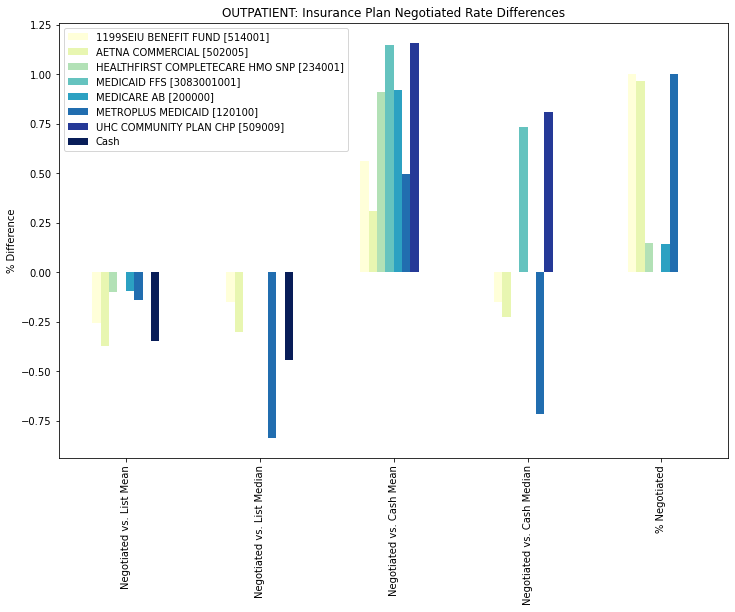

In [206]:
# plot the overall stats
OP_graph = OP_calculations[['Negotiated vs. List Mean',
                            'Negotiated vs. List Median',
                            'Negotiated vs. Cash Mean',
                            'Negotiated vs. Cash Median',
                            '% Negotiated']].transpose()
OP_graph.plot(kind='bar', colormap='YlGnBu', figsize=(12, 8))

plt.ylabel('% Difference')
#plt.yticks(np.arange(-1, 1.1, step=0.25))
plt.legend(loc='upper left')
plt.title('OUTPATIENT: Insurance Plan Negotiated Rate Differences')

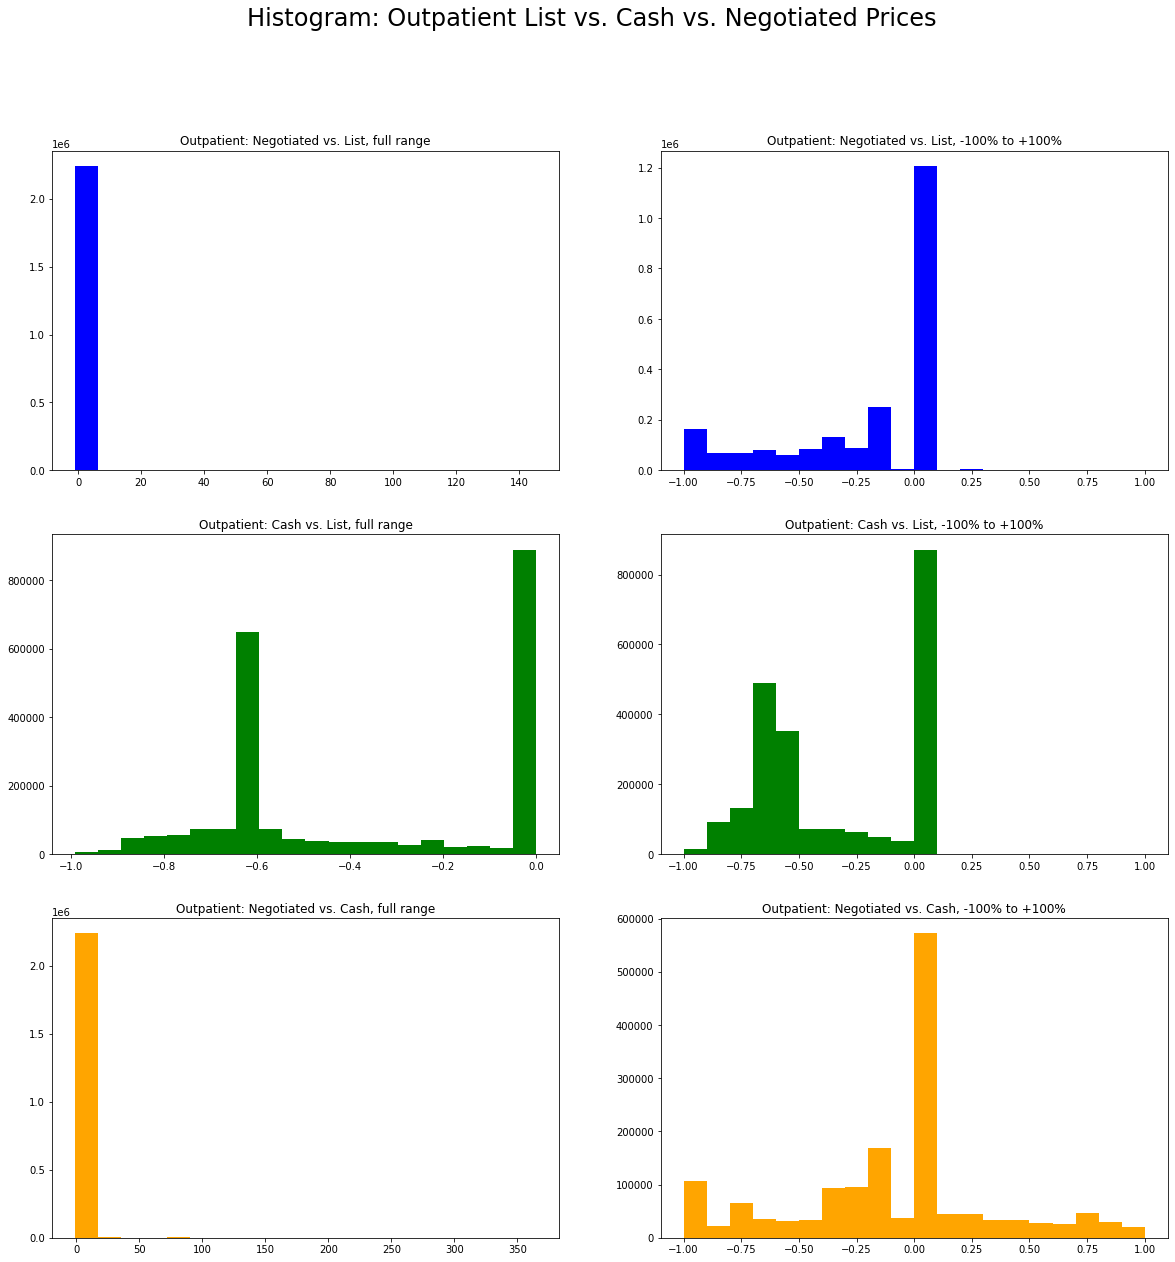

In [207]:
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(20,20))
fig.suptitle('Histogram: Outpatient List vs. Cash vs. Negotiated Prices',size=24)

axs = axs.ravel()

axs[0].hist(OP_final['Negotiated vs. List'],bins=20,color='blue')
axs[0].set_title('Outpatient: Negotiated vs. List, full range')

axs[1].hist(OP_final['Negotiated vs. List'],bins=20,color='blue',range=[-1,1])
axs[1].set_title('Outpatient: Negotiated vs. List, -100% to +100%')

axs[2].hist(OP_final['Cash vs. List'],bins=20,color='green')
axs[2].set_title('Outpatient: Cash vs. List, full range')

axs[3].hist(OP_final['Cash vs. List'],bins=20,color='green',range=[-1,1])
axs[3].set_title('Outpatient: Cash vs. List, -100% to +100%')

axs[4].hist(OP_final['Negotiated vs. Cash'],bins=20,color='orange')
axs[4].set_title('Outpatient: Negotiated vs. Cash, full range')

axs[5].hist(OP_final['Negotiated vs. Cash'],bins=20,color='orange',range=[-1,1])
axs[5].set_title('Outpatient: Negotiated vs. Cash, -100% to +100%')

plt.show()

Text(0.5, 1.0, 'OUTPATIENT: Insurance Plan Negotiated Rate Differences, Where Insurer Negotiated Rate')

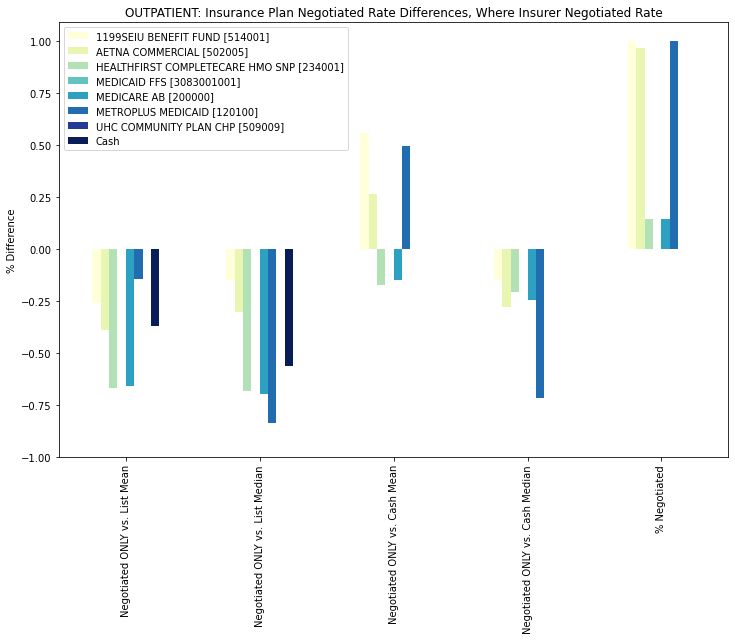

In [208]:
# plot the negotiated only stats
OP_graph2 = OP_calculations[['Negotiated ONLY vs. List Mean',
                             'Negotiated ONLY vs. List Median',
                             'Negotiated ONLY vs. Cash Mean',
                             'Negotiated ONLY vs. Cash Median',
                             '% Negotiated']].transpose()
OP_graph2.plot(kind='bar', colormap='YlGnBu', figsize=(12, 8))

plt.ylabel('% Difference')
plt.yticks(np.arange(-1, 1.1, step=0.25))
plt.legend(loc='upper left')
plt.title('OUTPATIENT: Insurance Plan Negotiated Rate Differences, Where Insurer Negotiated Rate')

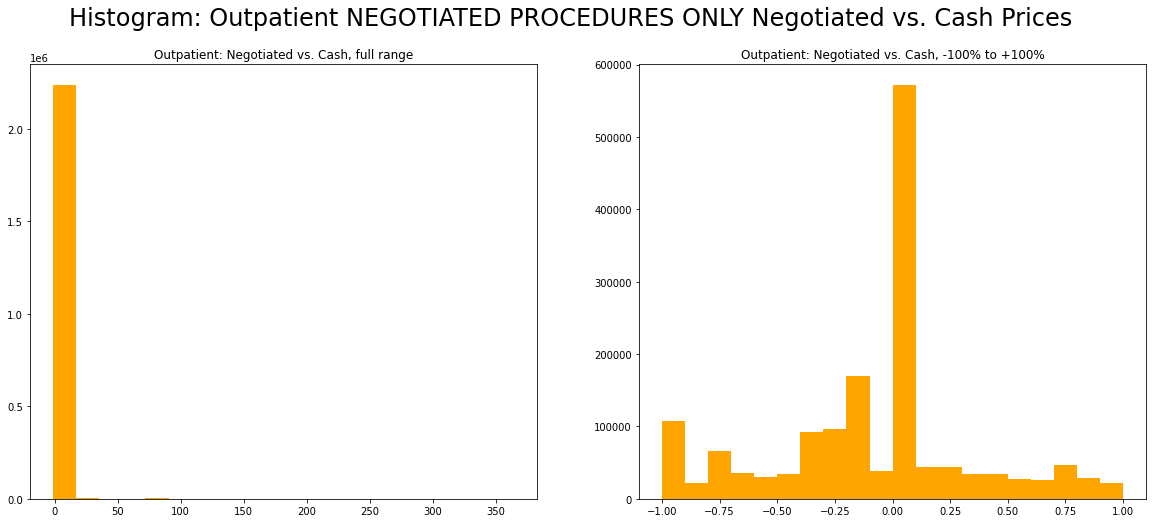

In [209]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
fig.suptitle('Histogram: Outpatient NEGOTIATED PROCEDURES ONLY Negotiated vs. Cash Prices',size=24)

axs = axs.ravel()

axs[0].hist(OP_final['Negotiated vs. Cash'],bins=20,color='orange')
axs[0].set_title('Outpatient: Negotiated vs. Cash, full range')

axs[1].hist(OP_final['Negotiated vs. Cash'],bins=20,color='orange',range=[-1,1])
axs[1].set_title('Outpatient: Negotiated vs. Cash, -100% to +100%')

plt.show()

In [210]:
OP_NvC_dict = {}
for plan in OP_Plans.index:
    temp_df = OP_final[OP_final['Plan(s)']==plan].copy()
    
    better_negotiated = round(len(temp_df[temp_df['Negotiated vs. Cash'] < 0])/len(temp_df),4)*100
    no_difference = round(len(temp_df[temp_df['Negotiated vs. Cash'] == 0])/len(temp_df),4)*100
    worse_negotiated = round(100 -(better_negotiated + no_difference),4)
    
    OP_NvC_dict[plan] = [better_negotiated,no_difference,worse_negotiated]
    
OP_NvC_df = pd.DataFrame.from_dict(OP_NvC_dict,orient='index',columns=['% Better than Cash', '% Same as Cash', '% Worse than Cash'])
OP_NvC_df

,% Better than Cash,% Same as Cash,% Worse than Cash
UHC COMMUNITY PLAN CHP [509009],0.00,38.71,61.29
MEDICARE AB [200000],10.21,40.64,49.15
HEALTHFIRST COMPLETECARE HMO SNP [234001],10.46,40.12,49.42
1199SEIU BENEFIT FUND [514001],56.78,0.85,42.37
AETNA COMMERCIAL [502005],58.16,0.20,41.64
MEDICAID FFS [3083001001],0.00,39.25,60.75
METROPLUS MEDICAID [120100],80.01,0.00,19.99


In [211]:
OP_NvCNO_dict = {}
no_negotiation = []
for plan in OP_Plans.index:
    if plan in OP_negotiated_only['Plan(s)'].to_list():
        temp_df = OP_negotiated_only[OP_negotiated_only['Plan(s)']==plan].copy()

        better_negotiated = round(len(temp_df[temp_df['Negotiated vs. Cash'] < 0])/len(temp_df),4)*100
        no_difference = round(len(temp_df[temp_df['Negotiated vs. Cash'] == 0])/len(temp_df),4)*100
        worse_negotiated = round(100 -(better_negotiated + no_difference),4)

        OP_NvCNO_dict[plan] = [better_negotiated,no_difference,worse_negotiated]
    else:
        no_negotiation.append(plan)
    
OP_NvCNO_df = pd.DataFrame.from_dict(OP_NvCNO_dict,orient='index',columns=['% Better than Cash', '% Same as Cash', '% Worse than Cash'])
print(no_negotiation)
OP_NvCNO_df

['UHC COMMUNITY PLAN CHP [509009]', 'MEDICAID FFS [3083001001]']


,% Better than Cash,% Same as Cash,% Worse than Cash
MEDICARE AB [200000],71.15,13.73,15.12
HEALTHFIRST COMPLETECARE HMO SNP [234001],70.68,9.83,19.49
1199SEIU BENEFIT FUND [514001],56.80,0.85,42.35
AETNA COMMERCIAL [502005],60.19,0.20,39.61
METROPLUS MEDICAID [120100],80.01,0.00,19.99


## <font color=blue> 2. Comparing Prices in NYC Public Hospitals </font>

We now want to look at how list prices and discounted cash prices differ among the 11 hospitals in this system.

We will look at the codes that are present in each hospital's dataset. We will then group by procedure code to get the mean/median list + cash prices for each procedure across all 11 hospitals. Next, we  merge those means/medians back into the dataframe. Finally, we can calculate how each hospital's list/cash price for a given procedure differs from the mean/median across all 11 hospitals.

We can then calculate the mean and median % difference for each hospital across all procedures, and plot the results. We will do this for both Inpatient and Outpatient procedures.

In [212]:
Hospitals = masterfile['Hospital Name'].value_counts()
Num_Hospitals = len(Hospitals)
Num_Hospitals

11

In [213]:
df_hospital = df_final.copy()
df_hospital.head()

,Procedure,Code,Procedure Description,Procedure Type,Payer,Plan(s),List Price,Adjusted Cash Price,Negotiated Price,Hospital Name,Negotiated vs. List,Cash vs. List,Negotiated vs. Cash
0,7509657101,96571,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,1199 NATIONAL BENEFIT FUND [5140],1199SEIU BENEFIT FUND [514001],1073.73,429.49,32.00,Bellevue,-0.970197,-0.600002,-0.925493
1,7509657101,96571,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,AETNA COMM [5020],AETNA COMMERCIAL [502005],1073.73,429.49,53.66,Bellevue,-0.950025,-0.600002,-0.875061
2,7509657101,96571,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,HEALTHFIRST MCR [2340],HEALTHFIRST COMPLETECARE HMO SNP [234001],1073.73,429.49,NaN,Bellevue,0.000000,-0.600002,1.500012
3,7509657101,96571,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,MEDICAID ALTERNATE PAYER [3083000],MEDICAID FFS [3083001001],1073.73,429.49,NaN,Bellevue,0.000000,-0.600002,1.500012
4,7509657101,96571,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,MEDICARE [2000],MEDICARE AB [200000],1073.73,429.49,NaN,Bellevue,0.000000,-0.600002,1.500012


In [214]:
# drop procedures if they do not exist in each hospital's dataset
Drop_Procedures = df_hospital[['Procedure','Hospital Name']].copy()
Drop_Procedures.drop_duplicates(inplace=True)
Drop_Procedures = Drop_Procedures.groupby(['Procedure']).count()
Drop_Procedures.sort_values(by='Hospital Name',ascending=False,inplace=True)
Drop_Procedures.reset_index(inplace=True)

Drop_Procedures = Drop_Procedures[Drop_Procedures['Hospital Name']<Num_Hospitals]

# drop the procedures and slim down dataframe to just include the columns we care about
df_hospital_final = df_hospital[~df_hospital['Procedure'].isin(Drop_Procedures['Procedure'].tolist())]
df_hospital_final = df_hospital_final[['Procedure','Procedure Description','Procedure Type','List Price','Adjusted Cash Price','Hospital Name']]
df_hospital_final.drop_duplicates(inplace=True)
df_hospital_final.reset_index(drop=True,inplace=True)

df_hospital_final.head()

,Procedure,Procedure Description,Procedure Type,List Price,Adjusted Cash Price,Hospital Name
0,7509657101,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,1073.73,429.49,Bellevue
1,3500042T01,CT HEAD CEREBRAL PERFUSION ANALYSIS W CONTRAST,OP,1098.85,439.54,Bellevue
2,3600075T01,IR TRANSCATH EXCRAN VERT OR CAR A STENT,OP,5733.85,2293.54,Bellevue
3,3600076T01,IR TRANSCATH EXCRAN VERT OR CAR A STENT ADD,OP,4557.95,1823.18,Bellevue
4,9200107T01,QUANT SENSORY TEST&INTERPJ/XTR W/VIBRJ STIMULI,OP,467.44,186.98,Bellevue


In [215]:
# calculate mean and median list price for each procedure
df_hospital_list_means = df_hospital_final[['Procedure','List Price']].groupby(['Procedure']).mean()
df_hospital_list_means.rename(columns={'List Price':'List Price Mean'},inplace=True)
df_hospital_list_medians = df_hospital_final[['Procedure','List Price']].groupby(['Procedure']).median()
df_hospital_list_medians.rename(columns={'List Price':'List Price Median'},inplace=True)

# calculate mean and median adjusted cash price for each procedure
df_hospital_cash_means = df_hospital_final[['Procedure','Adjusted Cash Price']].groupby(['Procedure']).mean()
df_hospital_cash_means.rename(columns={'Adjusted Cash Price':'Adjusted Cash Price Mean'},inplace=True)
df_hospital_cash_medians = df_hospital_final[['Procedure','Adjusted Cash Price']].groupby(['Procedure']).median()
df_hospital_cash_medians.rename(columns={'Adjusted Cash Price':'Adjusted Cash Price Median'},inplace=True)

In [216]:
# merge means/medians into original dataframe
df_hospital_final = pd.merge(df_hospital_final, df_hospital_list_means,on='Procedure')
df_hospital_final = pd.merge(df_hospital_final, df_hospital_list_medians,on='Procedure')
df_hospital_final = pd.merge(df_hospital_final, df_hospital_cash_means,on='Procedure')
df_hospital_final = pd.merge(df_hospital_final, df_hospital_cash_medians,on='Procedure')

df_hospital_final.head()

,Procedure,Procedure Description,Procedure Type,List Price,Adjusted Cash Price,Hospital Name,List Price Mean,List Price Median,Adjusted Cash Price Mean,Adjusted Cash Price Median
0,7509657101,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,1073.73,429.49,Bellevue,1073.73,1073.73,429.49,429.49
1,7509657101,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,1073.73,429.49,Coney Island,1073.73,1073.73,429.49,429.49
2,7509657101,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,1073.73,429.49,Elmhurst,1073.73,1073.73,429.49,429.49
3,7509657101,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,1073.73,429.49,Harlem,1073.73,1073.73,429.49,429.49
4,7509657101,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,1073.73,429.49,Jacobi,1073.73,1073.73,429.49,429.49


In [217]:
# calculate % difference for each procedure at each hospital's list price vs. mean/median
df_hospital_final['List Price vs. Mean'] = df_hospital_final['List Price']/df_hospital_final['List Price Mean'] - 1
df_hospital_final['List Price vs. Median'] = df_hospital_final['List Price']/df_hospital_final['List Price Median'] - 1

# calculate % difference for each procedure at each hospital's cash price vs. mean/median
df_hospital_final['Cash Price vs. Mean'] = df_hospital_final['Adjusted Cash Price']/df_hospital_final['Adjusted Cash Price Mean'] - 1
df_hospital_final['Cash Price vs. Median'] = df_hospital_final['Adjusted Cash Price']/df_hospital_final['Adjusted Cash Price Median'] - 1

df_hospital_final.head()

,Procedure,Procedure Description,Procedure Type,List Price,Adjusted Cash Price,Hospital Name,List Price Mean,List Price Median,Adjusted Cash Price Mean,Adjusted Cash Price Median,List Price vs. Mean,List Price vs. Median,Cash Price vs. Mean,Cash Price vs. Median
0,7509657101,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,1073.73,429.49,Bellevue,1073.73,1073.73,429.49,429.49,2.220446e-16,0.0,4.440892e-16,0.0
1,7509657101,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,1073.73,429.49,Coney Island,1073.73,1073.73,429.49,429.49,2.220446e-16,0.0,4.440892e-16,0.0
2,7509657101,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,1073.73,429.49,Elmhurst,1073.73,1073.73,429.49,429.49,2.220446e-16,0.0,4.440892e-16,0.0
3,7509657101,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,1073.73,429.49,Harlem,1073.73,1073.73,429.49,429.49,2.220446e-16,0.0,4.440892e-16,0.0
4,7509657101,BRONCHOSCOPY WITH PHOTODYNAMIC THERAPY EACH AD...,OP,1073.73,429.49,Jacobi,1073.73,1073.73,429.49,429.49,2.220446e-16,0.0,4.440892e-16,0.0


### <font color=orange> Inpatient Calculations </font>

In [218]:
# create table of Inpatient means of these % difference columns
IP_hospital_means = df_hospital_final[df_hospital_final['Procedure Type']=='IP'] [['Hospital Name',
                                                                                   'List Price vs. Mean',
                                                                                   'List Price vs. Median',
                                                                                   'Cash Price vs. Mean',
                                                                                   'Cash Price vs. Median']].groupby(['Hospital Name']).mean()

IP_hospital_means

,List Price vs. Mean,List Price vs. Median,Cash Price vs. Mean,Cash Price vs. Median
Hospital Name,,,,
Bellevue,0.017907,0.035646,-0.332062,0.001836
Coney Island,0.042484,0.061383,0.676517,1.574928
Elmhurst,0.014861,0.033503,0.631325,1.517167
Harlem,-0.014725,0.002825,0.583989,1.441537
Jacobi,0.014416,0.033365,0.630912,1.516364
Kings County,0.014140,0.032690,-0.341855,-0.009764
Lincoln,-0.075323,-0.058484,-0.400133,-0.092542
Metropolitan,-0.005312,0.012137,-0.353903,-0.025288
North Central Bronx,-0.012243,0.004722,-0.360573,-0.036510


Text(0.5, 1.0, 'INPATIENT: Mean Variation in Prices in NYC Hospital System')

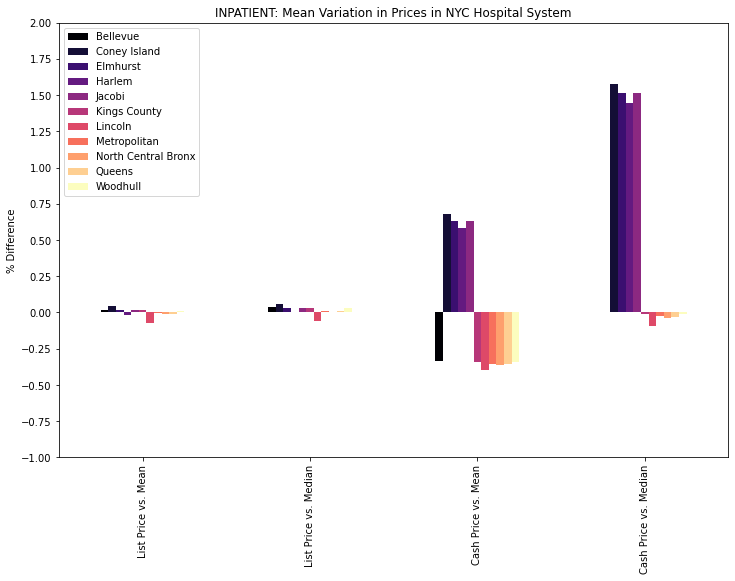

In [219]:
# plot Inpatient mean differences
IP_hospital_graph = IP_hospital_means.transpose()

IP_hospital_graph.plot(kind='bar', colormap='magma', figsize=(12, 8))

plt.ylabel('% Difference')
plt.yticks(np.arange(-1, 2.1, step=0.25))
plt.legend(loc='upper left')
plt.title('INPATIENT: Mean Variation in Prices in NYC Hospital System')

In [220]:
# create table of Inpatient medians of these % difference columns
IP_hospital_medians = df_hospital_final[df_hospital_final['Procedure Type']=='IP'] [['Hospital Name',
                                                                                     'List Price vs. Mean',
                                                                                     'List Price vs. Median',
                                                                                     'Cash Price vs. Mean',
                                                                                     'Cash Price vs. Median']].groupby(['Hospital Name']).median()

IP_hospital_medians

,List Price vs. Mean,List Price vs. Median,Cash Price vs. Mean,Cash Price vs. Median
Hospital Name,,,,
Bellevue,1.978244e-03,0.000000,-0.350516,0.000000
Coney Island,3.800708e-03,0.000000,0.621084,1.500000
Elmhurst,2.220446e-16,0.000000,0.613322,1.500000
Harlem,-3.065402e-03,0.000000,0.605234,1.493015
Jacobi,0.000000e+00,0.000000,0.611234,1.499999
Kings County,0.000000e+00,0.000000,-0.350625,0.000000
Lincoln,-2.562219e-02,-0.006411,-0.364047,0.000000
Metropolitan,-4.098509e-03,0.000000,-0.351547,0.000000
North Central Bronx,-5.124232e-03,0.000000,-0.352112,0.000000


Text(0.5, 1.0, 'INPATIENT: Median Variation in Prices in NYC Hospital System')

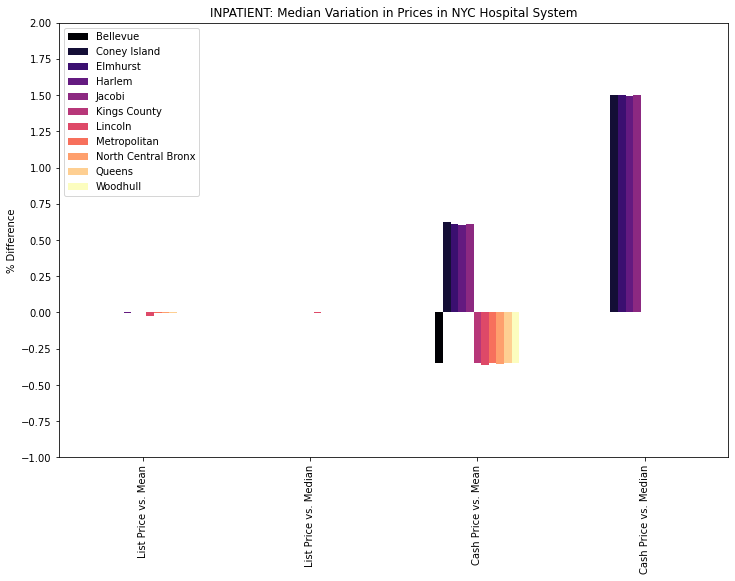

In [221]:
# plot Inpatient median differences
IP_hospital_graph2 = IP_hospital_medians.transpose()

IP_hospital_graph2.plot(kind='bar', colormap='magma', figsize=(12, 8))

plt.ylabel('% Difference')
plt.yticks(np.arange(-1, 2.1, step=0.25))
plt.legend(loc='upper left')
plt.title('INPATIENT: Median Variation in Prices in NYC Hospital System')

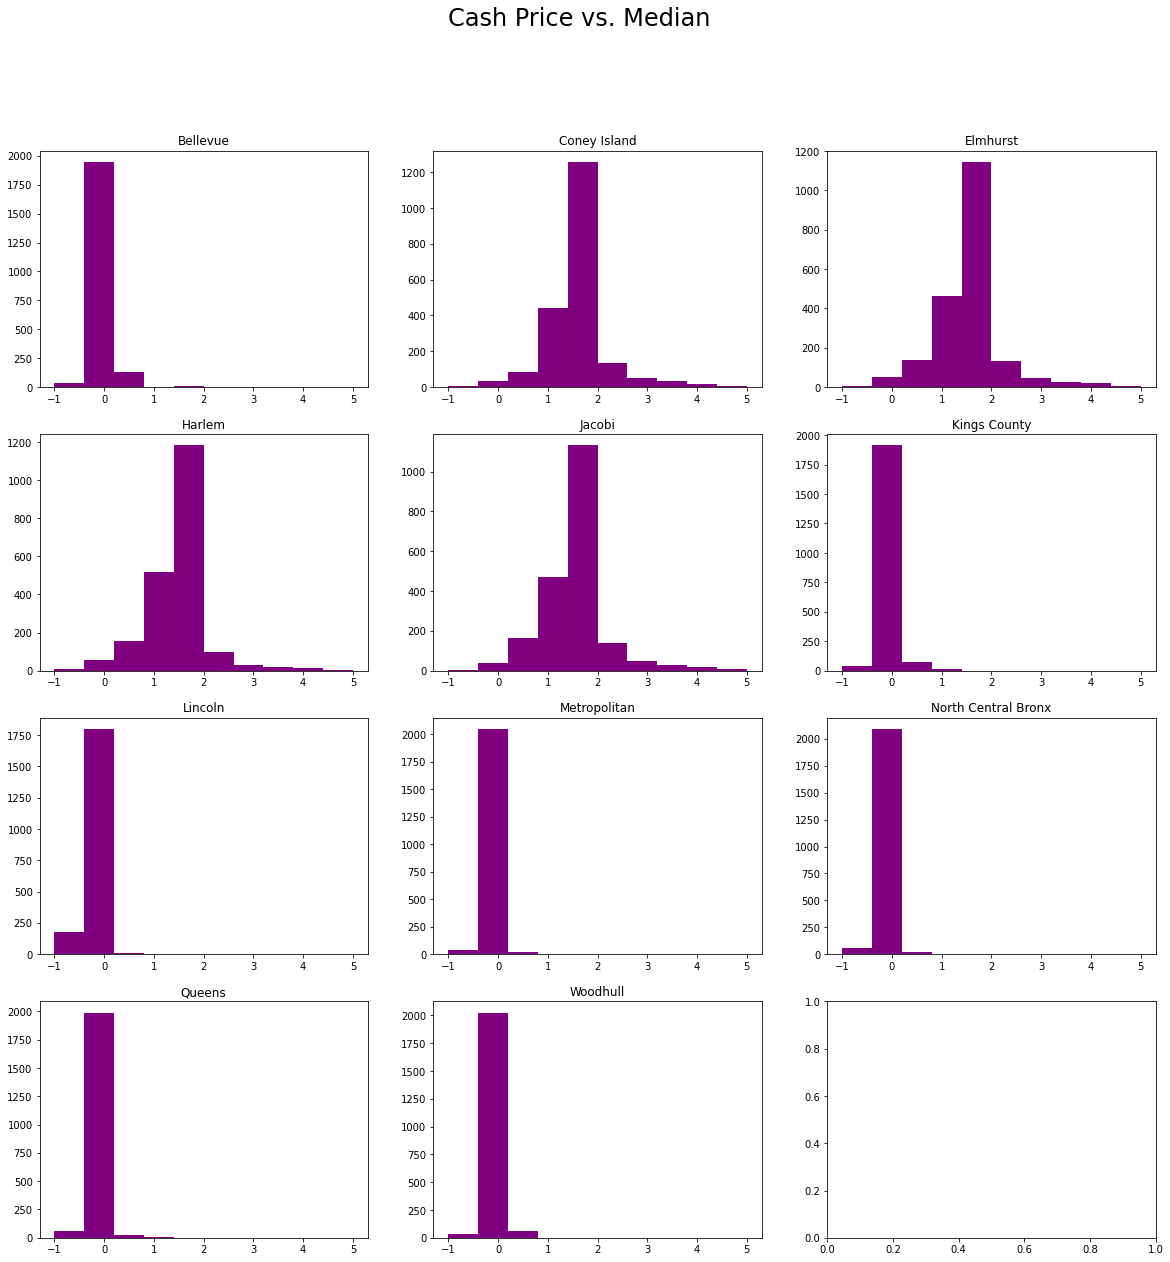

In [222]:
fig, axs = plt.subplots(nrows=4,ncols=3,figsize=(20,20))
fig.suptitle('Cash Price vs. Median',size=24)

df_IP = df_hospital_final[df_hospital_final['Procedure Type']=='IP'].copy()
axs = axs.ravel()
for i in range(len(hospitals)):
    df_hospital_temp = df_IP[df_IP['Hospital Name']==hospitals[i]].copy()
    axs[i].hist(df_hospital_temp['Cash Price vs. Median'], bins=10, color='purple',range=[-1,5])
    axs[i].set_title(hospitals[i])

plt.show()

### <font color=orange> Outpatient Calculations </font>

In [223]:
# create table of Outpatient means of these % difference columns
OP_hospital_means = df_hospital_final[df_hospital_final['Procedure Type']=='OP'] [['Hospital Name',
                                                                                   'List Price vs. Mean',
                                                                                   'List Price vs. Median',
                                                                                   'Cash Price vs. Mean',
                                                                                   'Cash Price vs. Median']].groupby(['Hospital Name']).mean()

OP_hospital_means

,List Price vs. Mean,List Price vs. Median,Cash Price vs. Mean,Cash Price vs. Median
Hospital Name,,,,
Bellevue,0.013894,0.005435,0.014781,0.004600
Coney Island,-0.016848,-0.016856,-0.018768,-0.017391
Elmhurst,-0.016823,-0.015528,-0.018582,-0.017579
Harlem,-0.017378,-0.019802,-0.019013,-0.019837
Jacobi,0.014179,0.004865,0.012142,0.004972
Kings County,0.013899,0.004747,0.014512,0.003410
Lincoln,-0.017676,-0.018592,-0.016223,-0.019388
Metropolitan,-0.017600,-0.017844,-0.016063,-0.017603
North Central Bronx,0.013817,0.003469,0.014856,0.003573


Text(0.5, 1.0, 'OUTPATIENT: Mean Variation in Prices in NYC Hospital System')

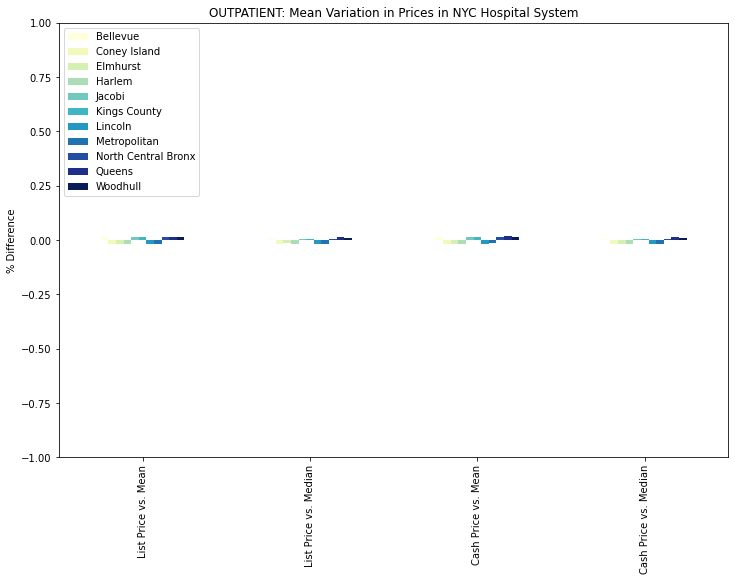

In [224]:
# plot Outpatient mean differences
OP_hospital_graph = OP_hospital_means.transpose()

OP_hospital_graph.plot(kind='bar', colormap='YlGnBu', figsize=(12, 8))

plt.ylabel('% Difference')
plt.yticks(np.arange(-1, 1.1, step=0.25))
plt.legend(loc='upper left')
plt.title('OUTPATIENT: Mean Variation in Prices in NYC Hospital System')

In [225]:
# create table of Outpatient medians of these % difference columns
OP_hospital_medians = df_hospital_final[df_hospital_final['Procedure Type']=='OP'] [['Hospital Name',
                                                                                   'List Price vs. Mean',
                                                                                   'List Price vs. Median',
                                                                                   'Cash Price vs. Mean',
                                                                                   'Cash Price vs. Median']].groupby(['Hospital Name']).median()

OP_hospital_medians

,List Price vs. Mean,List Price vs. Median,Cash Price vs. Mean,Cash Price vs. Median
Hospital Name,,,,
Bellevue,0.0,0.0,0.0,0.0
Coney Island,0.0,0.0,0.0,0.0
Elmhurst,0.0,0.0,0.0,0.0
Harlem,0.0,0.0,0.0,0.0
Jacobi,0.0,0.0,0.0,0.0
Kings County,0.0,0.0,0.0,0.0
Lincoln,0.0,0.0,0.0,0.0
Metropolitan,0.0,0.0,0.0,0.0
North Central Bronx,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'OUTPATIENT: Median Variation in Prices in NYC Hospital System')

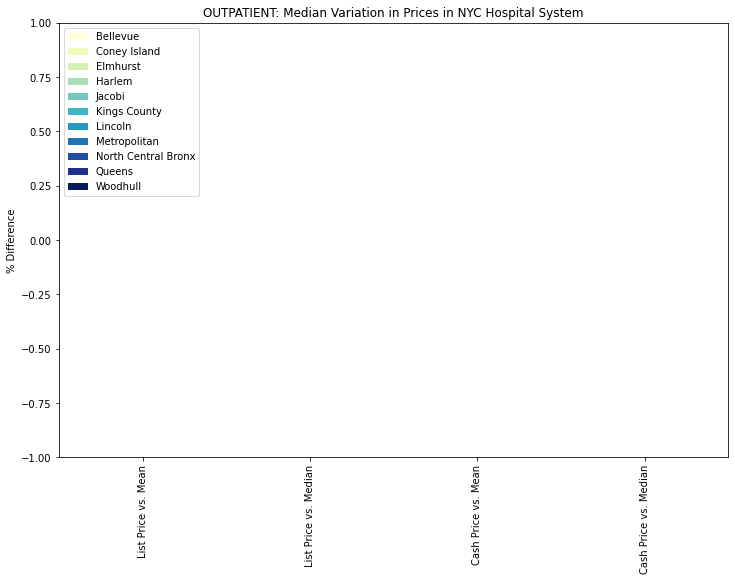

In [226]:
# plot Outpatient median differences
OP_hospital_graph2 = OP_hospital_medians.transpose()

OP_hospital_graph2.plot(kind='bar', colormap='YlGnBu', figsize=(12, 8))

plt.ylabel('% Difference')
plt.yticks(np.arange(-1, 1.1, step=0.25))
plt.legend(loc='upper left')
plt.title('OUTPATIENT: Median Variation in Prices in NYC Hospital System')

In [227]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "abode118/nyc-public-hospital-pricing-analysis" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/abode118/nyc-public-hospital-pricing-analysis


'https://jovian.ai/abode118/nyc-public-hospital-pricing-analysis'